# Plotting Data

Able to plot any data against any either using seaborn and pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import os
import seaborn as sns
from pandas import pivot_table
import curvature

%matplotlib inline

def analysis(df,x,y,z,plot):
    sns.set()
    colormap = sns.cubehelix_palette(start=.5, rot=-.75,as_cmap=True)
    table = pivot_table(df, values=z, index=[x],columns=[y], aggfunc=np.mean)
    # Draw a heatmap with the numeric values in each cell
    sns.heatmap(table, annot=True, fmt="f", linewidths=.5, ax=ax[plot],cmap=colormap)

Will retrieve all images from data folder, parse the name to gather the metadata and then commit the information to the .h5 folder under a certain date

Update:
../data/DATE and the date given in commit argument

In [10]:
%%bash
rm lce_curvature_dbase.h5

In [11]:
for i in os.listdir('../data/'):
    if not i.startswith('.'):
        path = '../data/' + i
        md = i.split('_')
        metadata = {
            'cylinder_radius':float(md[0]),
            'pitch':md[1],
            'coil':md[2],
            'thickness':md[3],
            'width':md[4],
            'E_value':md[5],
            'A_value':md[6][:-4]
        }
        curvature.commit_image('lce_curvature_dbase.h5',path,
                           np.array([0,50,100]),9.525,metadata,date='11 07 2017')
 

Plot and save images from specific date, and then make dataframe from the information

Index(['level_0', 'index', 'A_value', 'E_value', 'coil', 'cylinder_radius',
       'date', 'fixity', 'physical_conversion', 'physical_radii',
       'physical_radius_scale', 'pitch', 'strain', 'thickness', 'width',
       'x_center_scale', 'y_center_scale'],
      dtype='object')


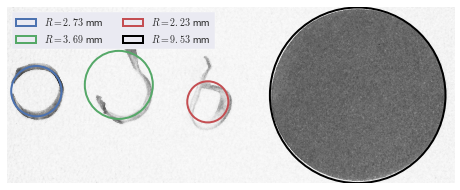

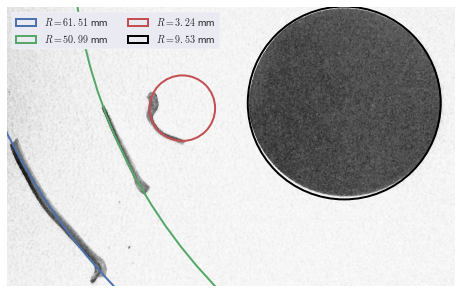

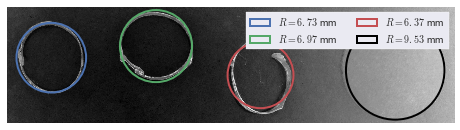

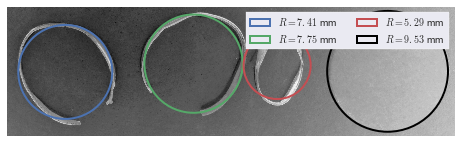

In [12]:
lceimage = curvature.LCEImage('lce_curvature_dbase.h5')

for i,image in enumerate(lceimage['11_07_17']):
    image.peek(save2file='../tmp_plots/{}_plot.png'.format(i))
    
df = lceimage.to_dataframe()
print(df.columns)

In [ ]:
lceimage.meta

In [ ]:
lceimage['11_07_17'][0].meta

In [ ]:
df

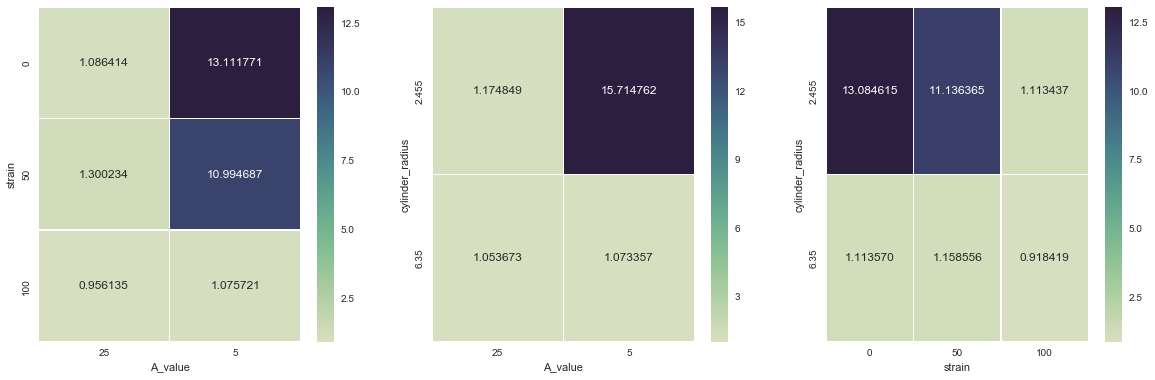

In [6]:
f, ax = plt.subplots(1,3,figsize=(20, 6))
analysis(df,'strain','A_value','fixity',0)
analysis(df,'cylinder_radius','A_value','fixity',1)
analysis(df,'cylinder_radius','strain','fixity',2)
